**What is Pipeline in HuggingFace![pipeline_2.png](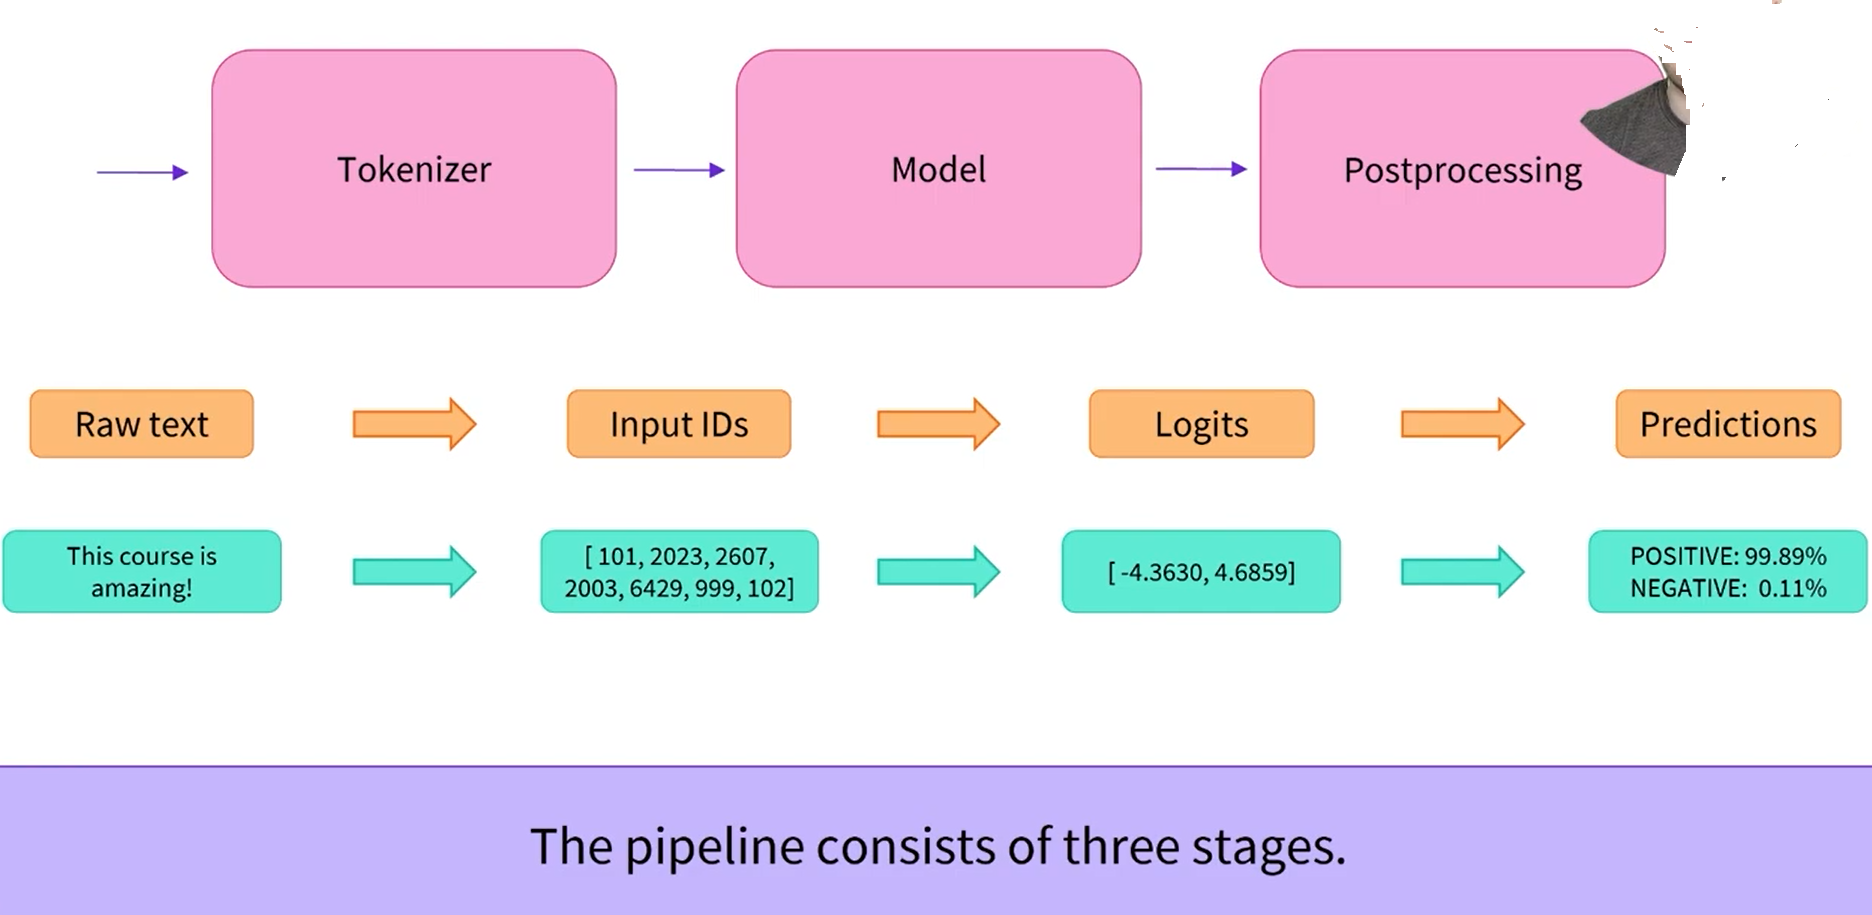![pipeline_3.png](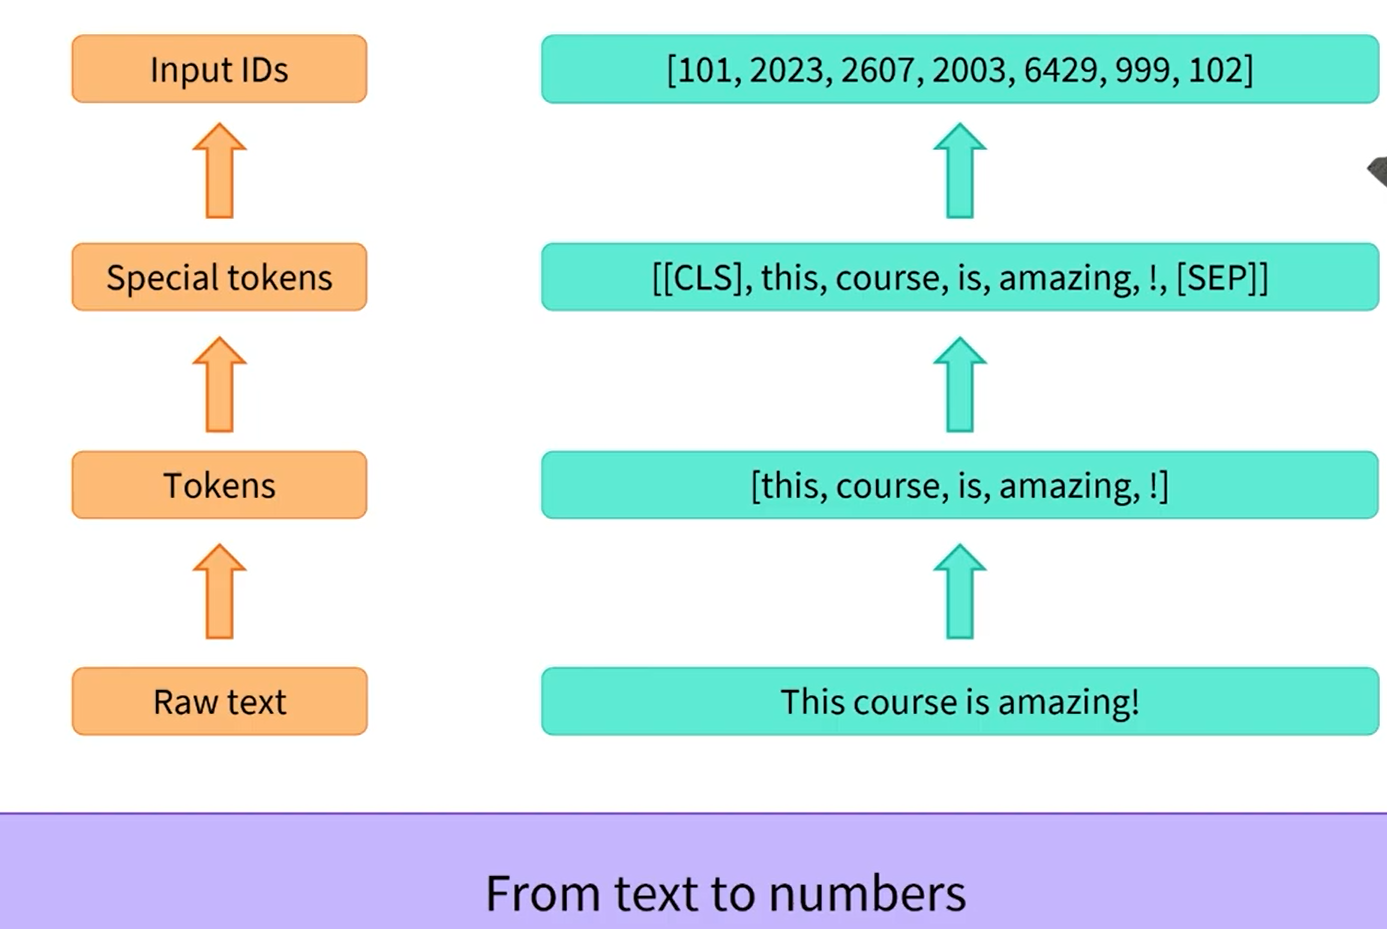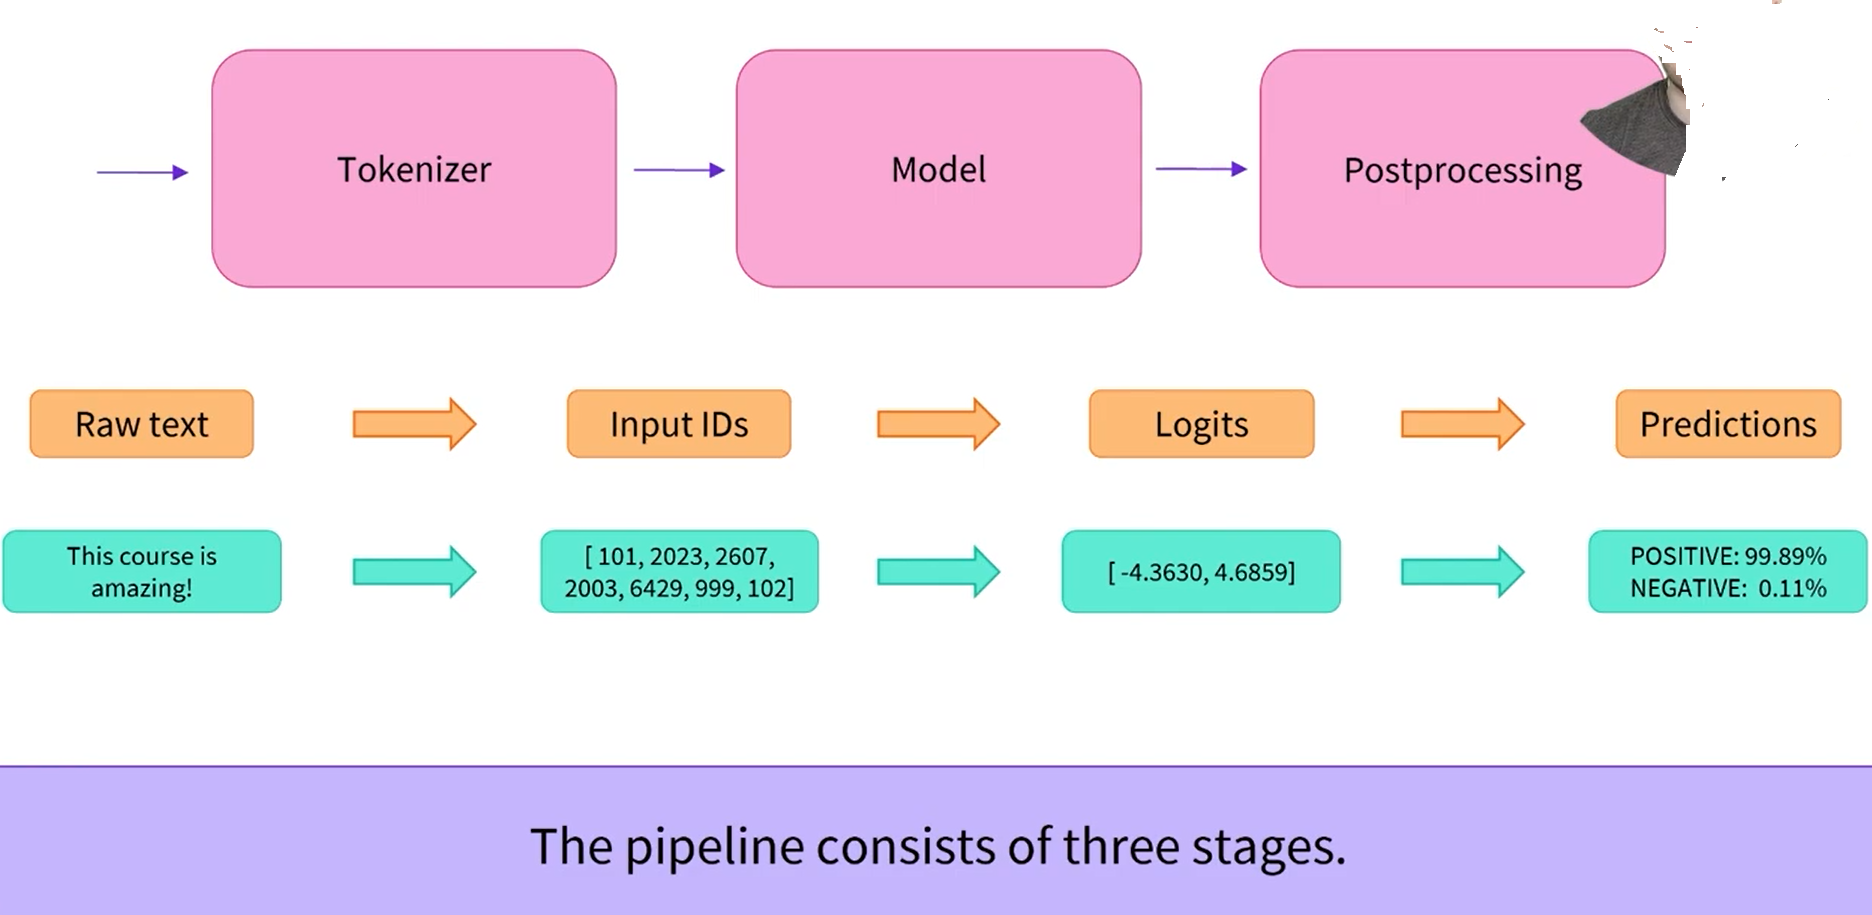))**

It is an end-to-end solution provided for NLP applications
Consist of three stages:
1. Pre-processing
2. Model
2. Post Processing



In [ ]:
from transformers import pipeline

**Sentiment Analysis Pipeline**

In [ ]:
classifier=pipeline('sentiment-analysis')
classifier('I have been waiting for a HuggingFace course my whole life.' )

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.9433634877204895}]

In [ ]:
# you can pass multiple texts to the object returned to a pipeline to treat them together
classifier([
    'I have been waiting for a HuggingFace course my whole life.',
    'I hate this so much.'
])

[{'label': 'POSITIVE', 'score': 0.9433634877204895},
 {'label': 'NEGATIVE', 'score': 0.9995205402374268}]

**Zero Shot Classification**
It lets you select labels for classification. It supports multi-label classification

In [ ]:
classifier=pipeline('zero-shot-classification')
classifier(
    'This is a course about Transformer Library',
    candidate_labels=['education','politics','business']
)

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

{'sequence': 'This is a course about Transformer Library',
 'labels': ['education', 'business', 'politics'],
 'scores': [0.9508553743362427, 0.03605080768465996, 0.01309382263571024]}

**Text Generation Pipeline**
This pipeline allows us to generate text from a given prompt

In [ ]:
generator =pipeline('text-generation')
generator("In this course we will learn how to")

No model was supplied, defaulted to openai-community/gpt2 and revision 6c0e608 (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'In this course we will teach how to perform a complete set of experiments using our data analysis method. The results will be interpreted in a way which will be easy for current and future programmers.\n\n\nWe will take a test class which allows you to'}]

In [ ]:
#Using a particular model in pipeline
generator=pipeline('text-generation',model='distilgpt2')
generator("In this course, we will learn  how to",
          max_length=30,
          num_return_sequences=2)

config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'In this course, we will teach you how to use the techniques to control and control this behavior. We will teach you the ways to use the tools'},
 {'generated_text': 'In this course, we will teach you how to learn more about using the language in the classroom and what kind of language you can use from there.'}]

**Fill-mask Pipeline** This pipeline will predict the missing words in the text

In [ ]:
unmasker=pipeline('fill-mask')
unmasker('This course will teach you all about <mask> models',top_k=3)

No model was supplied, defaulted to distilbert/distilroberta-base and revision ec58a5b (https://huggingface.co/distilbert/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert/distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

[{'score': 0.1963157057762146,
  'token': 30412,
  'token_str': ' mathematical',
  'sequence': 'This course will teach you all about mathematical models'},
 {'score': 0.044492196291685104,
  'token': 745,
  'token_str': ' building',
  'sequence': 'This course will teach you all about building models'},
 {'score': 0.03937116637825966,
  'token': 27930,
  'token_str': ' predictive',
  'sequence': 'This course will teach you all about predictive models'}]

**Token Classification** This pipeline identifies specific tokens and assigns them labels. For example: Named Entity recognition

In [ ]:
ner=pipeline('ner',grouped_entities=True)
ner('My name is Deepanshu. I study at TIET in patiala')

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/token_classification.py:168: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="simple"` instead.
  warnings.warn(


[{'entity_group': 'PER',
  'score': 0.996017,
  'word': 'Jasmeet',
  'start': 11,
  'end': 18},
 {'entity_group': 'ORG',
  'score': 0.98951244,
  'word': 'TIET',
  'start': 30,
  'end': 34},
 {'entity_group': 'LOC',
  'score': 0.98839575,
  'word': 'patiala',
  'start': 38,
  'end': 45}]

**Question Answering Pipeline** Extract answers to a question from a given context

In [ ]:
question_answer=pipeline('question-answering')
question_answer(
    question='Where do I study?',
    context='My name is Deepanshu. I study at TIET in Patiala'
)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


{'score': 0.47526755928993225,
 'start': 31,
 'end': 46,
 'answer': 'TIET in Patiala'}

**Summarization Pipeline** create summaries for long texts

In [ ]:
summarizer=pipeline('summarization')
summarizer("""Hugging Face, Inc. is a French-American company based in New York City
 that develops computation tools for building applications using machine learning. It is most notable for its transformers library built for natural language processing applications and its
platform that allows users to share machine learning models and datasets and showcase their work
The company was founded in 2016 by French entrepreneurs Clément Delangue, Julien Chaumond, and Thomas Wolf
in New York City, originally as a company that developed a chatbot app targeted at teenagers.[1] The company
was named after the "hugging face" emoji.[1] After open
sourcing the model behind the chatbot, the company pivoted to focus on being a platform for machine learning.""")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'summary_text': ' Hugging Face, Inc. is a French-American company that develops computation tools for building applications using machine learning . It is most notable for its transformers library built for natural language processing applications and its platform that allows users to share machine learning models and datasets and showcase their work . The company was named after the "hugging face" emoji .'}]

**Machine Translation Pipeline** This pipeline converts the source language text to target language text

In [ ]:
translator=pipeline('translation',model='Helsinki-NLP/opus-mt-en-hi')
translator('I love to study Conversational AI')

[{'translation_text': 'मुझे वार्तालापीय एआई का अध्ययन करना पसंद है'}]

**Inside the pipleline**


In [ ]:
#Stage 1: Tokenizer

from transformers import AutoTokenizer

checkpoint='distilbert-base-uncased-finetuned-sst-2-english'
tokenizer=AutoTokenizer.from_pretrained(checkpoint)

raw_inputs=['I have been waiting for this HuggingFace course my whole life',
            'I hate this so much']
inputs=tokenizer(raw_inputs,padding=True,truncation=True,return_tensors='tf')

print(inputs)


{'input_ids': <tf.Tensor: shape=(2, 14), dtype=int32, numpy=
array([[  101,  1045,  2031,  2042,  3403,  2005,  2023, 17662, 12172,
         2607,  2026,  2878,  2166,   102],
       [  101,  1045,  5223,  2023,  2061,  2172,   102,     0,     0,
            0,     0,     0,     0,     0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(2, 14), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)>}


In [ ]:
#Stage 2: Model

from transformers import TFAutoModelForSequenceClassification
checkpoint='distilbert-base-uncased-finetuned-sst-2-english'
model=TFAutoModelForSequenceClassification.from_pretrained(checkpoint)

outputs=model(inputs)

print(outputs.logits)

All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


tf.Tensor(
[[-2.1780643  2.260899 ]
 [ 4.2140603 -3.4158013]], shape=(2, 2), dtype=float32)


In [ ]:
#Stage 3: Post-processing

import tensorflow as tf
import numpy as np
predictions=tf.math.softmax(outputs.logits,axis=1)
print(np.argmax(predictions,axis=1))
model.config.id2label

[1 0]


{0: 'NEGATIVE', 1: 'POSITIVE'}